In [1]:
from pathlib import Path
from pandas.plotting import scatter_matrix
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
obesity_project_name = "playground-series-s4e2"

In [3]:
def load_obesity_data(project_name):
    zip_path = Path(f"{project_name}.zip")
    if not zip_path.is_file():
        !kaggle competitions download -c $project_name
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall()
    train_set = pd.read_csv(Path("train.csv"))
    test_set = pd.read_csv(Path("test.csv"))
    sample_submission = pd.read_csv(Path("sample_submission.csv"))
    return (train_set, test_set, sample_submission)

In [4]:
train_set, test_set, sample_submission = load_obesity_data(obesity_project_name)

In [5]:
train_set.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
for i in range(len(train_set.dtypes)):
    if train_set.dtypes.iloc[i] == "object":
        display(train_set.iloc[:, i].value_counts())

Gender
Female    10422
Male      10336
Name: count, dtype: int64

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

FAVC
yes    18982
no      1776
Name: count, dtype: int64

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

SMOKE
no     20513
yes      245
Name: count, dtype: int64

SCC
no     20071
yes      687
Name: count, dtype: int64

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [8]:
train_set.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

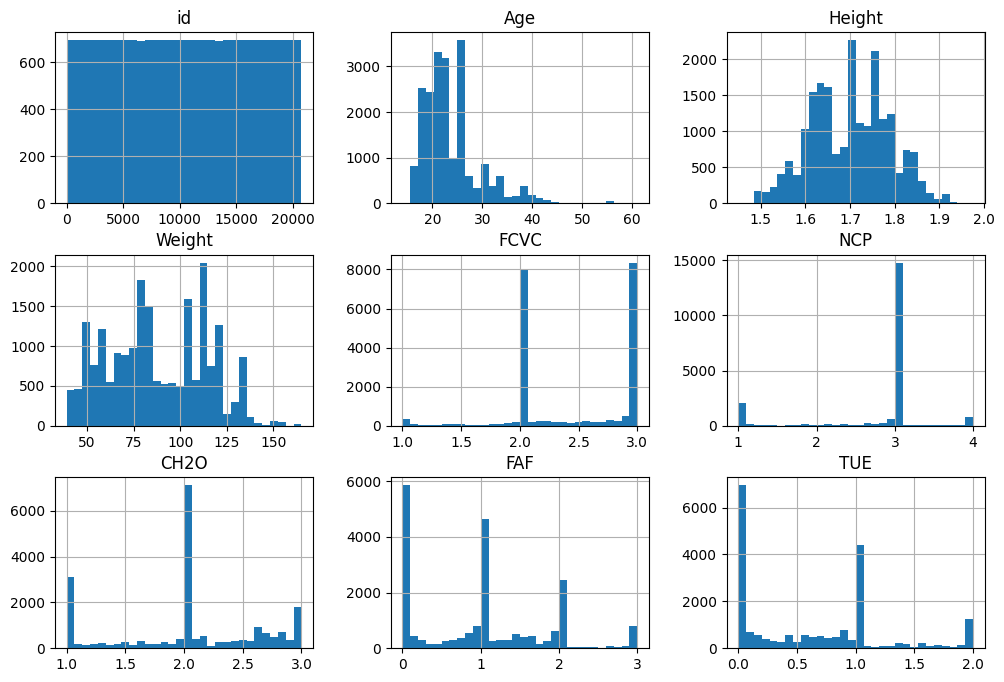

In [9]:
train_set.hist(bins=30, figsize=(12, 8))
plt.show()

In [10]:
num_attributes = []
for column in train_set.columns:
    if train_set.dtypes[column] != "object":
        num_attributes.append(column)

corr_matrix = train_set[num_attributes].corr()
display(corr_matrix)

id       Age    Height    Weight      FCVC       NCP      CH2O  \
id      1.000000  0.007634  0.012041  0.014020  0.002098 -0.000332  0.007917   
Age     0.007634  1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325   
Height  0.012041 -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706   
Weight  0.014020  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914   
FCVC    0.002098  0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299   
NCP    -0.000332 -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949   
CH2O    0.007917 -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000   
FAF     0.016719 -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932   
TUE     0.007667 -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654   

             FAF       TUE  
id      0.016719  0.007667  
Age    -0.192259 -0.296154  
Height  0.295278  0.076433  
Weight -0.084845 -0.086471  
FCVC   -0.089822 -0.147843  
NCP     0.100871  0.067459  
CH2O    0.082932 -0.010654  
FAF     1.000000  0.021213  
TUE     0.021213  1.000000

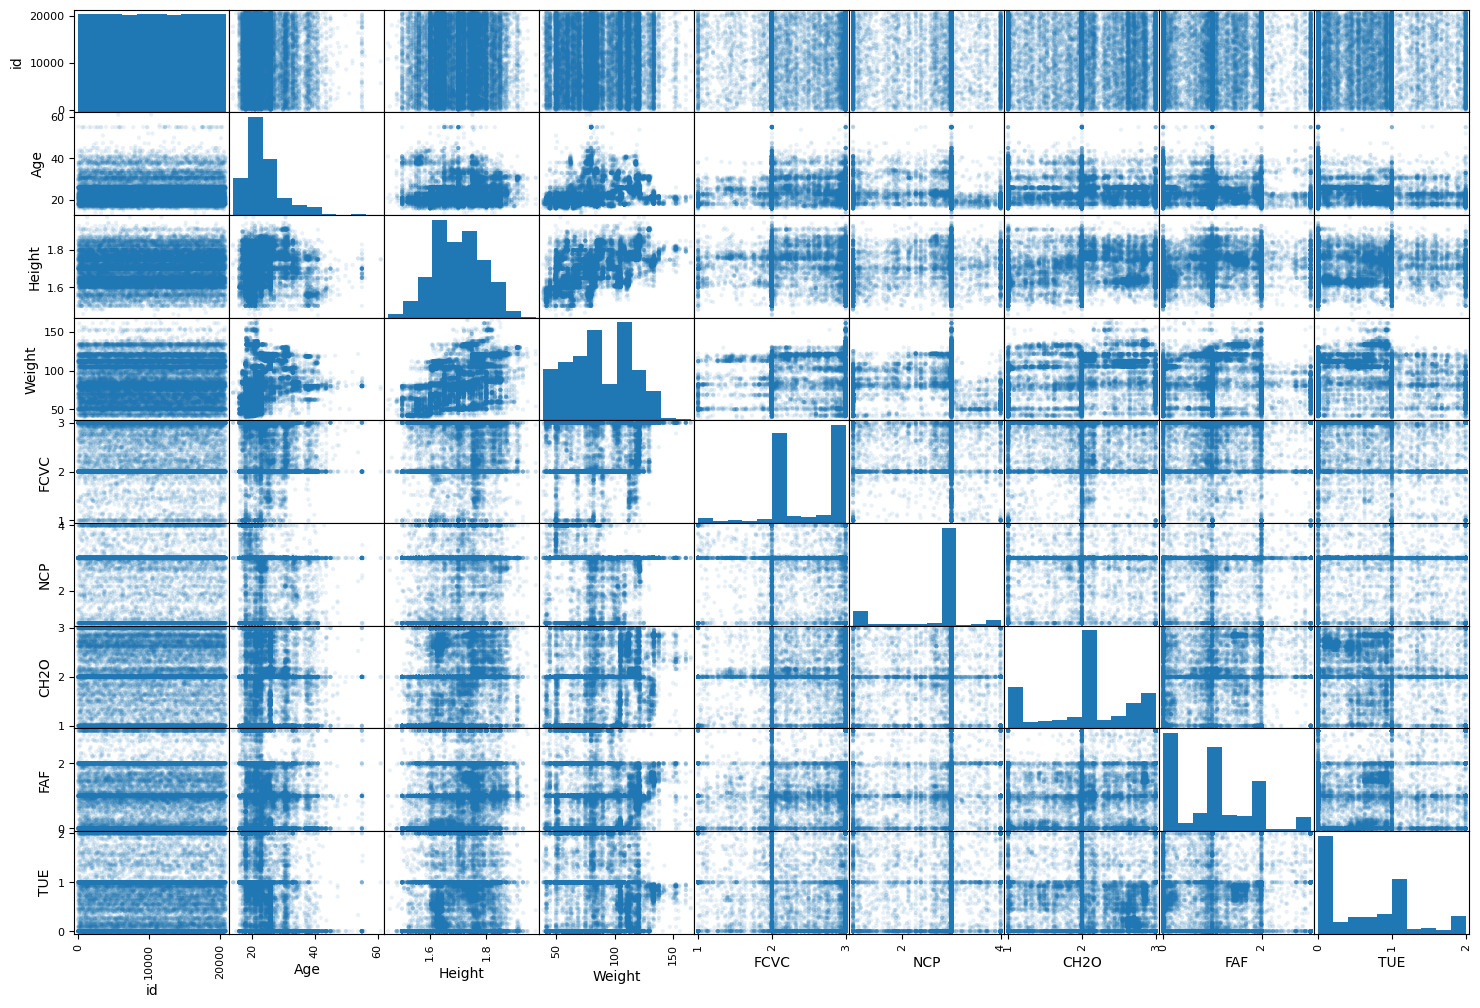

In [11]:
scatter_matrix(train_set[num_attributes], alpha=0.1, figsize=(18, 12))
plt.show()

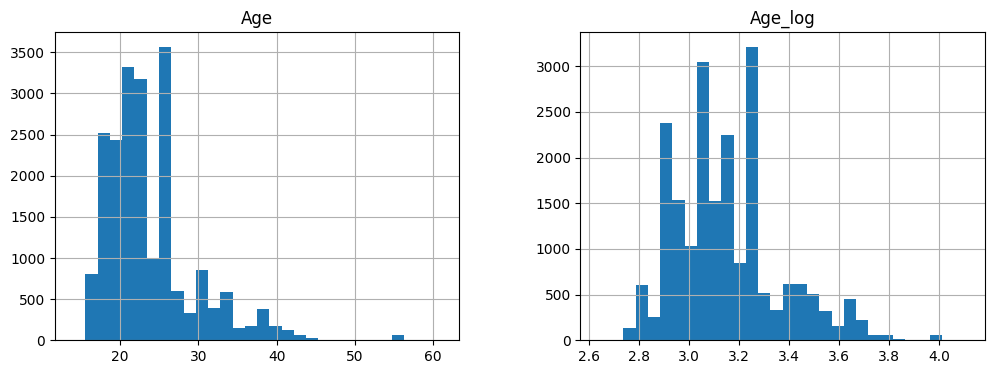

In [32]:
train_set_exp = train_set.copy()

train_set_exp["Age_log"] = np.log(train_set_exp["Age"])
train_set_exp[["Age", "Age_log"]].hist(bins=30, figsize=(12, 4))
plt.show()

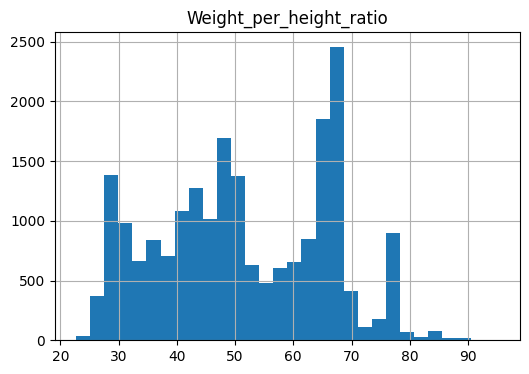

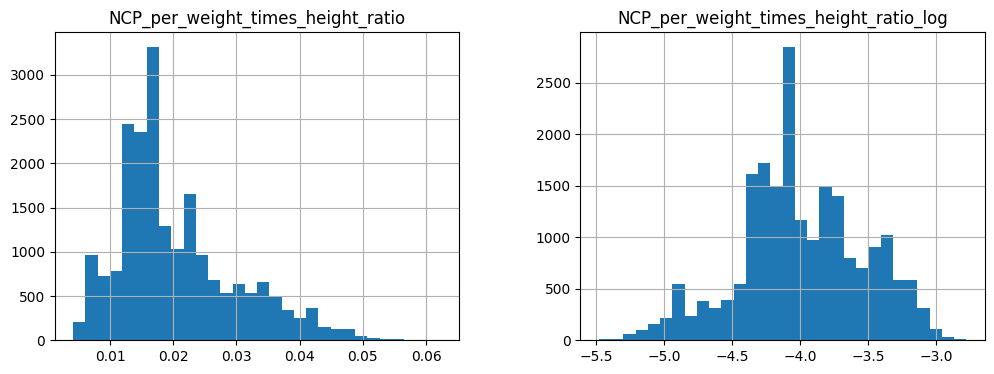

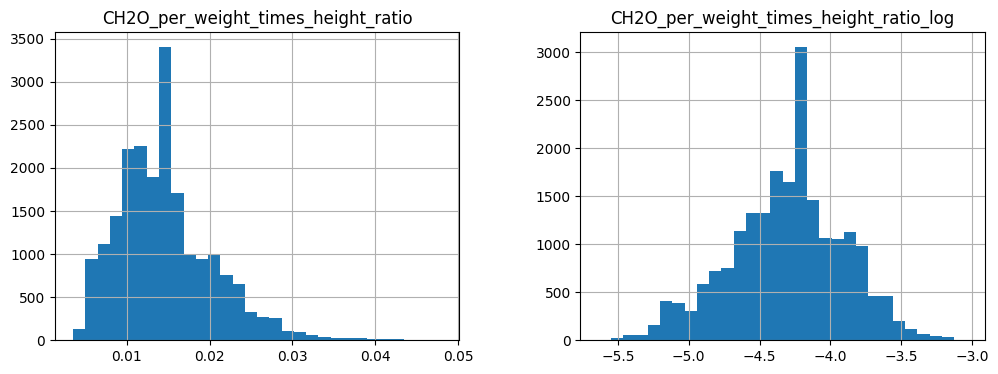

In [33]:
new_attributes = ["Weight_per_height_ratio", "FCVC_per_weight_times_height_ratio", "NCP_per_weight_times_height_ratio", "CH2O_per_weight_times_height_ratio"]

train_set_exp[new_attributes[0]] = train_set_exp["Weight"] / train_set_exp["Height"]
train_set_exp[new_attributes[1]] = train_set_exp["FCVC"] / (train_set_exp["Weight"] * train_set_exp["Height"])
train_set_exp[new_attributes[2]] = train_set_exp["NCP"] / (train_set_exp["Weight"] * train_set_exp["Height"])
train_set_exp[new_attributes[3]] = train_set_exp["CH2O"] / (train_set_exp["Weight"] * train_set_exp["Height"])

train_set_exp[[new_attributes[0]]].hist(bins=30, figsize=(6, 4))
plt.show()

train_set_exp[new_attributes[1] + "_log"] = np.log(train_set_exp[new_attributes[1]])
train_set_exp[[new_attributes[1], new_attributes[1] + "_log"]].hist(bins=30, figsize=(12, 4))
plt.show()

train_set_exp[new_attributes[2] + "_log"] = np.log(train_set_exp[new_attributes[2]])
train_set_exp[[new_attributes[2], new_attributes[2] + "_log"]].hist(bins=30, figsize=(12, 4))
plt.show()

train_set_exp[new_attributes[3] + "_log"] = np.log(train_set_exp[new_attributes[3]])
train_set_exp[[new_attributes[3], new_attributes[3] + "_log"]].hist(bins=30, figsize=(12, 4))
plt.show()

In [35]:
attributes_to_remove = ["id", "Age"]
num_attributes_new = [num_attribute for num_attribute in num_attributes if num_attribute not in attributes_to_remove] + ["Age_log"] + \
    [new_attributes[0]] + [new_attributes[1] + "_log"] + [new_attributes[2] + "_log"] + [new_attributes[3] + "_log"]

corr_matrix = train_set_exp[num_attributes_new].corr()
display(corr_matrix)

Height    Weight      FCVC  \
Height                                  1.000000  0.416677 -0.071546   
Weight                                  0.416677  1.000000  0.245682   
FCVC                                   -0.071546  0.245682  1.000000   
NCP                                     0.191383  0.095947  0.113349   
CH2O                                    0.183706  0.317914  0.101299   
FAF                                     0.295278 -0.084845 -0.089822   
TUE                                     0.076433 -0.086471 -0.147843   
Age_log                                 0.000812  0.338562  0.057883   
Weight_per_height_ratio                 0.268254  0.986341  0.274377   
FCVC_per_weight_times_height_ratio_log -0.517864 -0.728057  0.461953   
NCP_per_weight_times_height_ratio_log  -0.241382 -0.620546 -0.035482   
CH2O_per_weight_times_height_ratio_log -0.290793 -0.581959 -0.081886   

                                             NCP      CH2O       FAF  \
Height                                  0.191383  0.183706  0.295278   
Weight                                  0.095947  0.317914 -0.084845   
FCVC                                    0.113349  0.101299 -0.089822   
NCP                                     1.000000  0.080949  0.100871   
CH2O                                    0.080949  1.000000  0.082932   
FAF                                     0.100871  0.082932  1.000000   
TUE                                     0.067459 -0.010654  0.021213   
Age_log                                -0.050148  0.008259 -0.215963   
Weight_per_height_ratio                 0.074922  0.310662 -0.146648   
FCVC_per_weight_times_height_ratio_log -0.027722 -0.229224 -0.008558   
NCP_per_weight_times_height_ratio_log   0.698522 -0.174911  0.096822   
CH2O_per_weight_times_height_ratio_log -0.014437  0.558911  0.112770   

                                             TUE   Age_log  \
Height                                  0.076433  0.000812   
Weight                                 -0.086471  0.338562   
FCVC                                   -0.147843  0.057883   
NCP                                     0.067459 -0.050148   
CH2O                                   -0.010654  0.008259   
FAF                                     0.021213 -0.215963   
TUE                                     1.000000 -0.305572   
Age_log                                -0.305572  1.000000   
Weight_per_height_ratio                -0.101791  0.361652   
FCVC_per_weight_times_height_ratio_log -0.030355 -0.268653   
NCP_per_weight_times_height_ratio_log   0.099558 -0.273367   
CH2O_per_weight_times_height_ratio_log  0.061097 -0.295380   

                                        Weight_per_height_ratio  \
Height                                                 0.268254   
Weight                                                 0.986341   
FCVC                                                   0.274377   
NCP                                                    0.074922   
CH2O                                                   0.310662   
FAF                                                   -0.146648   
TUE                                                   -0.101791   
Age_log                                                0.361652   
Weight_per_height_ratio                                1.000000   
FCVC_per_weight_times_height_ratio_log                -0.683607   
NCP_per_weight_times_height_ratio_log                 -0.613253   
CH2O_per_weight_times_height_ratio_log                -0.564091   

                                        FCVC_per_weight_times_height_ratio_log  \
Height                                                               -0.517864   
Weight                                                               -0.728057   
FCVC                                                                  0.461953   
NCP                                                                  -0.027722   
CH2O                                                                 -0.229224 

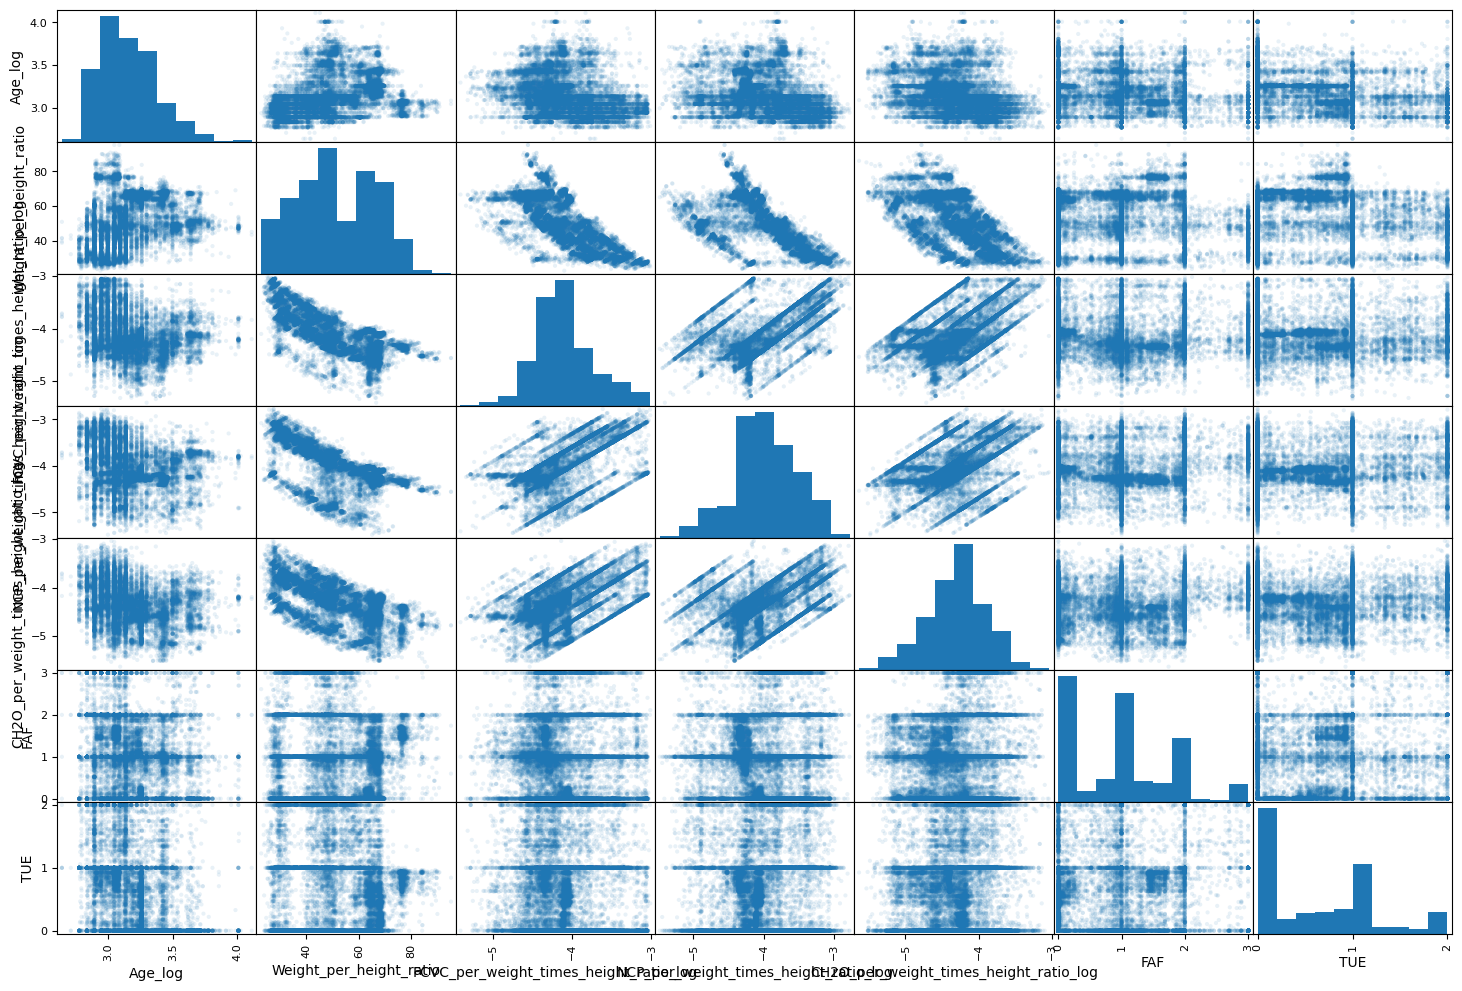

In [38]:
attributes_to_show = ["Age_log", "Weight_per_height_ratio", "FCVC_per_weight_times_height_ratio_log", "NCP_per_weight_times_height_ratio_log", \
                      "CH2O_per_weight_times_height_ratio_log", "FAF", "TUE"]
scatter_matrix(train_set_exp[attributes_to_show], alpha=0.1, figsize=(18, 12))
plt.show()